In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df1=pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [45]:
df1.shape

(13320, 9)

Drop some column which has not a great impact in our result value,in this case 'price'

In [46]:
df2=df1.drop(['availability','society','area_type','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


How many null/not availabe values in each column

In [47]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Drop these column which has null values,we can also take mean for these values,but here number of row is so high compared to these null value containing columns.So we can drop these column

In [48]:
df3=df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [49]:
df3.shape

(13246, 5)

This part shows us how many unique or different values in our size column

In [50]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Create new column,which contain just numeric values from size column

In [51]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))     #x will contain column values one by one
                                                                #after spliting the first 2,4,3 etc is also string so we convert them into integer

C:\Users\User\AppData\Local\Temp\ipykernel_4964\621279452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))     #x will contain column values one by one


In [52]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [53]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [54]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [55]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

This function check if it is possible to convert a value into float

In [56]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

This portion give us the value where total_sqft is not possible to convert into float.If we not use ~ sign then it return opposite value,means the value which is possible to convert into float

In [57]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [58]:
def convert_float(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [59]:
convert_float('5')

5.0

In [60]:
convert_float('3090 - 5002')

4046.0

In [61]:
convert_float('34.46Sq. Meter')

In [62]:
df4=df3.copy()
df4.shape

(13246, 6)

In [63]:
df4['total_sqft']=df4['total_sqft'].apply(convert_float)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


4125Perch this type of total_sqft values now containing NaN values.So we need remove these row

In [64]:
df4.loc[648]

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                9.0
price             265.0
bhk                   9
Name: 648, dtype: object

In [65]:
df4.shape

(13246, 6)

In [66]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [67]:
df5=df4.dropna()
df5.shape

(13200, 6)

In [68]:
df5.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

                        Feature Engineering 

In [69]:
df6=df5.copy()
df6.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [70]:
df6['Price_per_sqft']=df6['price']*100000/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [71]:
len(df6.location.unique())

1298

This will remove the leading space or any space at the end,in location

In [72]:
df6.location=df6.location.apply(lambda x: x.strip())

In [73]:
location_stats=df6.groupby('location')['location'].agg('count').sort_values(ascending=True)
#here groupby() just groups df6 by the unique values in 'location'
#['location'] selects the 'location' column from the grouped DataFrame.
#.agg('count') counting the number of occurrences for each unique value in the 'location' column.
location_stats

location
1 Annasandrapalya         1
Kodanda Reddy Layout      1
Konappana Agrahara        1
Kudlu Village,            1
Kumbhena Agrahara         1
                       ... 
Thanisandra             235
Kanakpura Road          264
Electronic City         304
Sarjapur  Road          392
Whitefield              533
Name: location, Length: 1287, dtype: int64

In [74]:
len(location_stats[location_stats<=10])

1047

In [75]:
location_stats_is_less_than_or_equal_10=location_stats[location_stats<=10]

In [76]:
len(df6.location.unique())

1287

In [77]:
df6.location=df6.location.apply(lambda x:'other' if x in location_stats_is_less_than_or_equal_10 else x)
len(df6.location.unique())

241

                            Outlier Removal

In [78]:
df6.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [79]:
df6.shape

(13200, 7)

In [80]:
df6[df6.total_sqft/df6.bhk <300].head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [81]:
df7=df6[~(df6.total_sqft/df6.bhk <300)]
df7.shape

(12456, 7)

In [82]:
df7.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [83]:
def remove_ppsqft_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_sqft)
        st=np.std(subdf.Price_per_sqft)
        reduced_df=subdf[(subdf.Price_per_sqft>(m-st))& (subdf.Price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)

    return df_out

df8=remove_ppsqft_outliers(df7)
df8.shape

(10242, 7)

In [84]:
import matplotlib

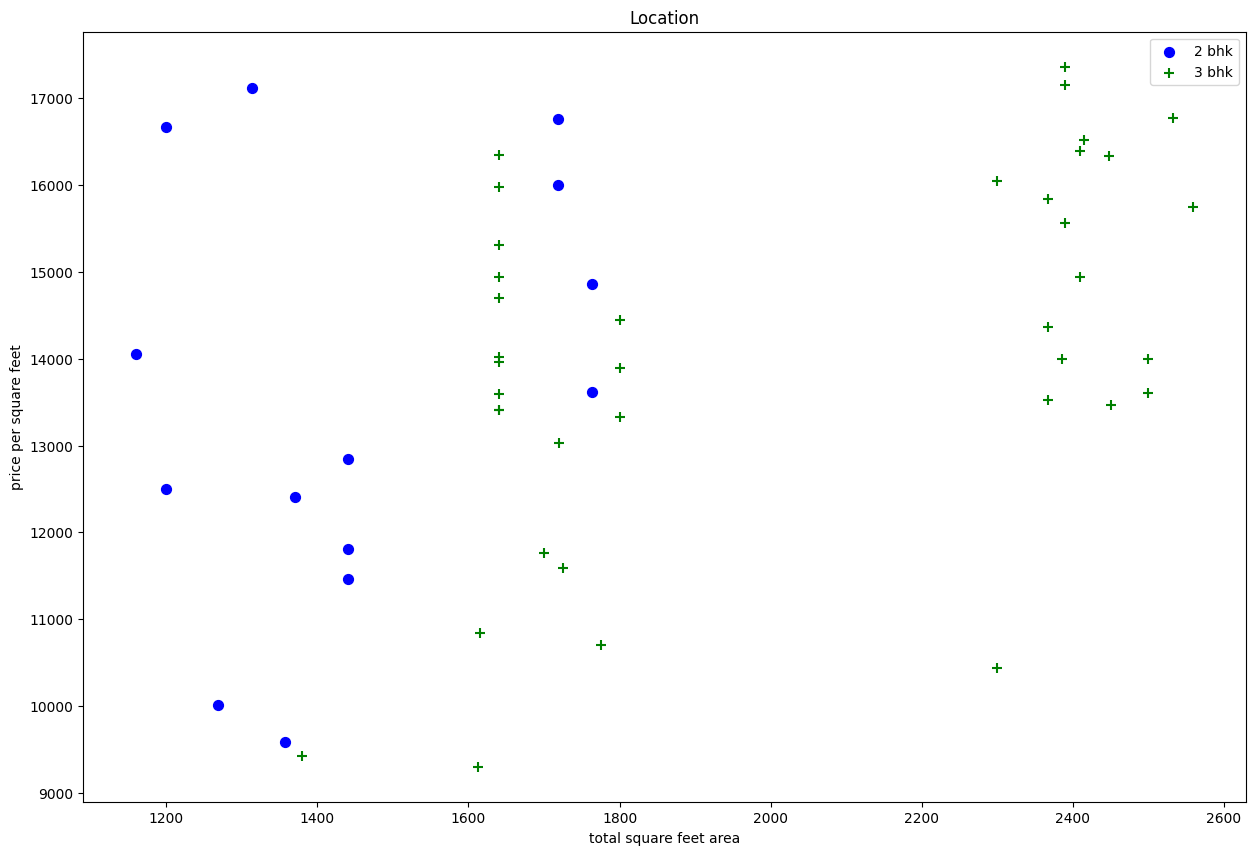

In [86]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)& (df.bhk==2)]
    bhk3=df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.Price_per_sqft,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.Price_per_sqft,marker='+',color='green',label='3 bhk',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price per square feet")
    plt.title('Location')
    plt.legend()

plot_scatter_chart(df8,'Rajaji Nagar')